In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns

In [2]:
df=pd.read_csv('MBG_Aud_tweets.csv')
df.head()

,Id,Time,Tweets
0,1295533463349714944,Tue Aug 18 01:55:53 +0000 2020,: Look up.://
1,15553134,Tue Aug 18 02:16:24 +0000 2020,BREAKING NEWS: the RNC announced the Republica...
2,1270157851642564610,Mon Aug 10 04:27:39 +0000 2020,Congratulations
3,1289000205140951041,Sat Aug 15 03:56:22 +0000 2020,Happie Independence Day to all fellow Indians
4,931941507392790528,Sat May 30 22:15:53 +0000 2020,"tropical anklet,beach anklet, summer Bracelet,..."


## Lemmization

In [3]:
nltk.download('wordnet')   
# define stop words
nltk.download('stopwords') 
stop_words = set(stopwords.words("english"))

def fix_Text2(text):
    letters_only = re.sub("[^a-zA-Z]"," ", str(text))
    words=letters_only.lower().split()
    meaningful=[WordNetLemmatizer().lemmatize(word) for word in words if word not in stop_words]
    return(" ".join(meaningful))

num_resp = df["Tweets"].size   #df
clean_description_lemmization = []     #clean_

for i in range(0,num_resp):
    clean_description_lemmization.append(fix_Text2(df["Tweets"][i])) #clean_

clean_description_lemmization[0:5]    ## clean_

[nltk_data] Downloading package wordnet to C:\Users\Lenovo
[nltk_data]     U31\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Lenovo
[nltk_data]     U31\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['look',
 'breaking news rnc announced republican convention end socially distanced group shot lysol',
 'congratulation',
 'happie independence day fellow indian',
 'tropical anklet beach anklet summer bracelet macrame accessor yarnybysahar via']

In [4]:
len(clean_description_lemmization)

773

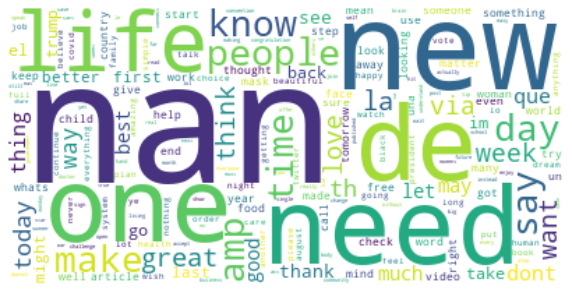

In [5]:
# word cloud
text_wc = " ".join(item for item in clean_description_lemmization)    #clean_
wordcloud = WordCloud(background_color="white").generate(text_wc)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [6]:
tv=TfidfVectorizer() 
tv_transform=tv.fit_transform(clean_description_lemmization)
tv_transform.shape

(773, 2767)

## Cluster audiences

In [7]:
from scipy.cluster.vq import kmeans,vq

In [8]:
num_clusters=6  # change the # of clusters
cluster_centers,distortion=kmeans(tv_transform.todense(),num_clusters)

## Unigram

In [9]:
tv=TfidfVectorizer(max_features=100)  # 1.change # of features 2.maybe min_df
tv_transform=tv.fit_transform(clean_description_lemmization)

In [10]:
terms=tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:6])

['watch', 'un', 'thought', 'country', 'better', 'face']
['amp', 'article', 'away', 'back', 'beautiful', 'best']
['watch', 'thing', 'dont', 'el', 'try', 'much']
['amp', 'article', 'away', 'back', 'beautiful', 'best']
['try', 'right', 'amp', 'article', 'away', 'back']
['go', 'keep', 'give', 'full', 'face', 'something']


## Inspect Unigram importance

In [11]:
columns=tv.get_feature_names() # feature names
#transform to DF
df_description=pd.DataFrame(tv_transform.toarray(),columns=columns) #df_
# insepct transformation
tv_sum=df_description.sum() #df
tv_sum.columns = ['importance']

In [12]:
tv_sum.sort_values(ascending=False).head(20)

nan       72.523075
new       14.816081
need      13.681997
like      13.018094
life      12.888784
via       12.807603
one       12.708487
say       12.270497
make      12.052492
great     11.928600
time      11.761063
love      11.502708
people    11.320694
amp       11.121246
want      11.085394
get       10.819067
day       10.733414
think     10.267144
know      10.225471
de        10.079547
dtype: float64

In [13]:
df_sum=pd.DataFrame(tv_sum,columns=['importance']).sort_values(by='importance',ascending=False).iloc[1:15]

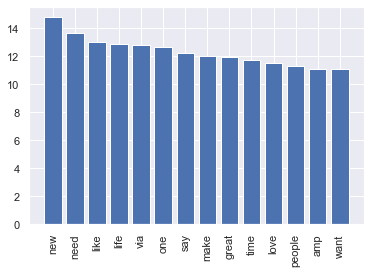

In [14]:
sns.set()
fig,ax=plt.subplots()
ax.bar(df_sum.index,df_sum.importance,label='importance')
ax.set_xticklabels(df_sum.index,rotation=90)
plt.show()

## Unigram - inspecting importance by cluster

### Cluster 1 Importance

In [15]:
cluster1=pd.DataFrame(zip(terms,list(cluster_centers[0]))).sort_values(by=1,ascending=False)
cluster1.columns = ['Words', 'Importance']
bar_cluster1=cluster1.sort_values(by=['Importance'], ascending=False).head(15)

In [17]:
cluster1

,Words,Importance
88,watch,0.007271
82,un,0.004830
76,thought,0.002607
10,country,0.002412
6,better,0.001900
...,...,...
15,el,0.000000
54,much,0.000000
56,need,0.000000
35,keep,0.000000


<IPython.core.display.Javascript object>


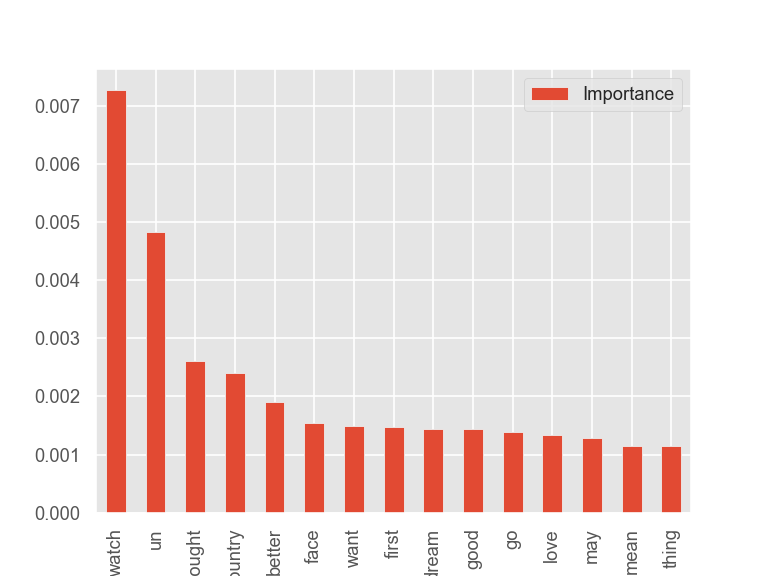

In [19]:
#bar graph
%matplotlib notebook
import matplotlib

matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster1.plot(x='Words', y='Importance', kind='bar')

### Cluster 2 Importance

In [20]:
cluster2=pd.DataFrame(zip(terms,list(cluster_centers[1]))).sort_values(by=1,ascending=False)
cluster2.columns = ['Words', 'Importance']
bar_cluster2=cluster2.sort_values(by=['Importance'], ascending=False).head(15)

In [21]:
cluster2

,Words,Importance
0,amp,0.0
63,right,0.0
73,thank,0.0
72,th,0.0
71,take,0.0
...,...,...
30,got,0.0
29,good,0.0
28,going,0.0
27,go,0.0


<IPython.core.display.Javascript object>


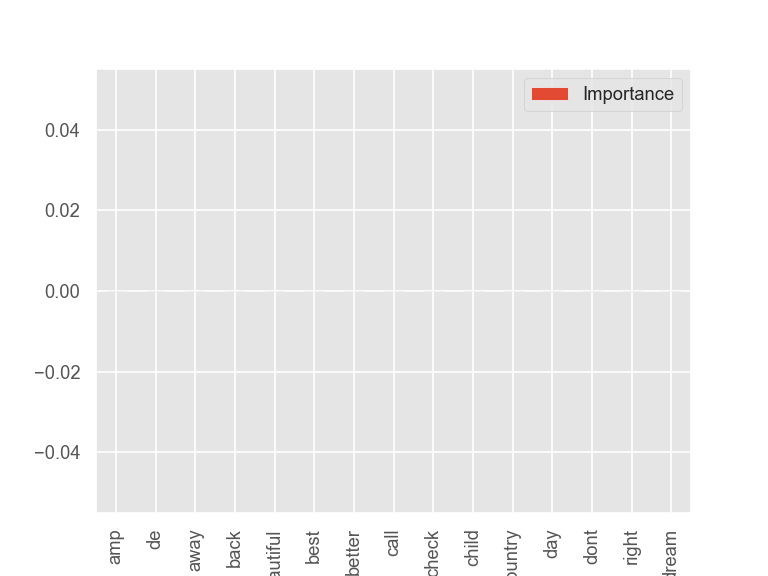

In [22]:
matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster2.plot(x='Words', y='Importance', kind='bar')

### Cluster 3 Importance

In [23]:
cluster3=pd.DataFrame(zip(terms,list(cluster_centers[2]))).sort_values(by=1,ascending=False)
cluster3.columns = ['Words', 'Importance']
bar_cluster3=cluster3.sort_values(by=['Importance'], ascending=False).head(15)

In [24]:
cluster3

,Words,Importance
88,watch,0.010022
74,thing,0.008238
13,dont,0.007097
15,el,0.007005
81,try,0.006670
...,...,...
32,health,0.000000
31,great,0.000000
30,got,0.000000
29,good,0.000000


<IPython.core.display.Javascript object>


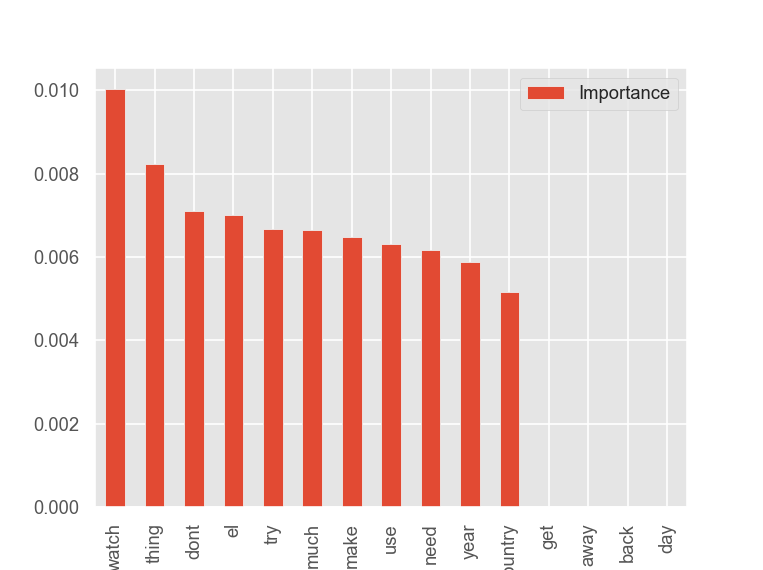

In [25]:
matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster3.plot(x='Words', y='Importance', kind='bar')

### Cluster 4 Importance

In [26]:
cluster4=pd.DataFrame(zip(terms,list(cluster_centers[3]))).sort_values(by=1,ascending=False)
cluster4.columns = ['Words', 'Importance']
bar_cluster4=cluster4.sort_values(by=['Importance'], ascending=False).head(15)

In [27]:
cluster4

,Words,Importance
0,amp,0.0
63,right,0.0
73,thank,0.0
72,th,0.0
71,take,0.0
...,...,...
30,got,0.0
29,good,0.0
28,going,0.0
27,go,0.0


<IPython.core.display.Javascript object>


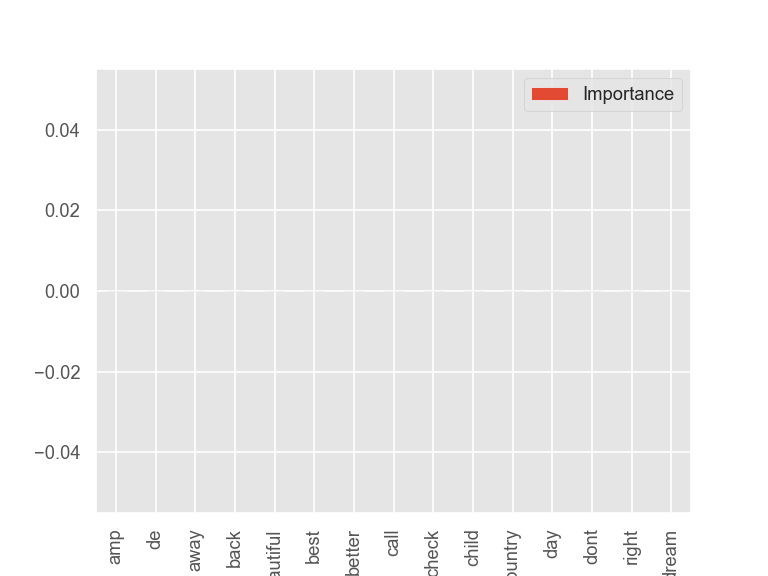

In [28]:
matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster4.plot(x='Words', y='Importance', kind='bar')

### Cluster 5 Importance

In [29]:
cluster5=pd.DataFrame(zip(terms,list(cluster_centers[4]))).sort_values(by=1,ascending=False)
cluster5.columns = ['Words', 'Importance']
bar_cluster5=cluster5.sort_values(by=['Importance'], ascending=False).head(15)

In [30]:
cluster5

,Words,Importance
81,try,0.059076
63,right,0.032699
0,amp,0.000000
72,th,0.000000
71,take,0.000000
...,...,...
30,got,0.000000
29,good,0.000000
28,going,0.000000
27,go,0.000000


<IPython.core.display.Javascript object>


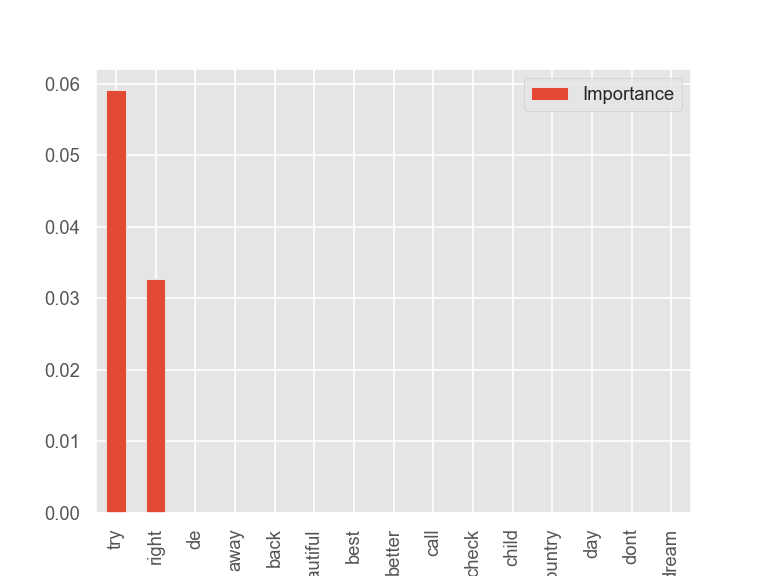

In [32]:
matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster5.plot(x='Words', y='Importance', kind='bar')

### Cluster 6 Importance

In [33]:
cluster6=pd.DataFrame(zip(terms,list(cluster_centers[5]))).sort_values(by=1,ascending=False)
cluster6.columns = ['Words', 'Importance']
bar_cluster6=cluster6.sort_values(by=['Importance'], ascending=False).head(15)

In [34]:
cluster6

,Words,Importance
27,go,0.022100
35,keep,0.012668
26,give,0.009180
24,full,0.008571
19,face,0.008560
...,...,...
33,help,0.000000
32,health,0.000000
31,great,0.000000
30,got,0.000000


<IPython.core.display.Javascript object>


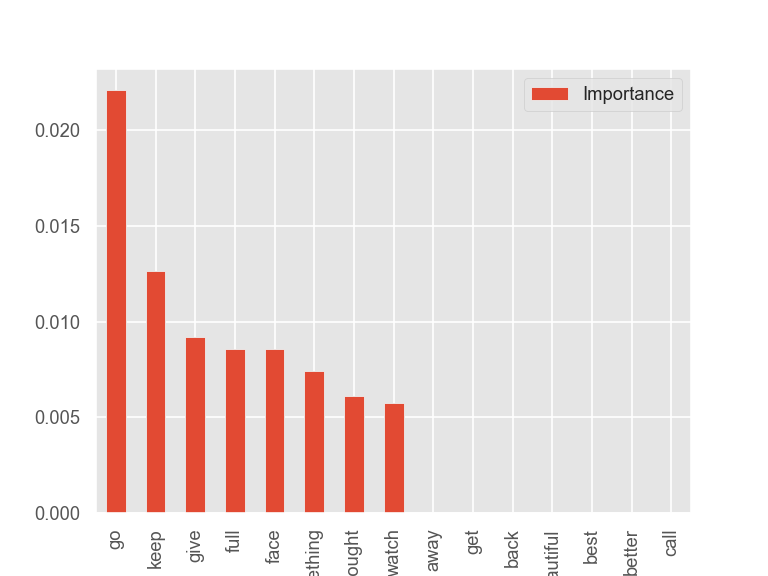

In [35]:
matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster6.plot(x='Words', y='Importance', kind='bar')

## Bigram

In [36]:
tv=TfidfVectorizer(max_features=100,ngram_range=(2,2)) 
tv_transform=tv.fit_transform(clean_description_lemmization)

In [37]:
terms=tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:5])

['trump administration', 'take time', 'sleep consumerism', 'bliss eso', 'back nov']
['act ki', 'affect oxygen', 'altura de', 'ask country', 'astonish mean']
['trump administration', 'self care', 'coming soon', 'continue continue', 'take mid']
['act ki', 'affect oxygen', 'altura de', 'ask country', 'astonish mean']
['take mid', 'oxygen level', 'act ki', 'affect oxygen', 'altura de']
['every single', 'joe biden', 'ear asmr', 'dont need', 'de la']


## Inspecting Bigram Importance

In [38]:
columns=tv.get_feature_names() # feature names
#transform to DF
df_description=pd.DataFrame(tv_transform.toarray(),columns=columns) #df_
# insepct transformation
tv_sum=df_description.sum() #df
tv_sum.columns = ['importance']

In [39]:
tv_sum.sort_values(ascending=False).head(20)

best thing         3.000000
dont need          2.691063
spend time         2.352937
make sure          2.352937
united state       2.251141
coming soon        2.000000
one day            2.000000
day week           2.000000
nothing like       2.000000
next week          2.000000
new york           2.000000
need another       2.000000
donald trump       2.000000
every single       2.000000
mental health      2.000000
run away           2.000000
fear often         2.000000
first step         2.000000
lot time           2.000000
great condition    2.000000
dtype: float64

In [40]:
df_sum=pd.DataFrame(tv_sum,columns=['importance']).sort_values(by='importance',ascending=False).iloc[1:15]

<IPython.core.display.Javascript object>


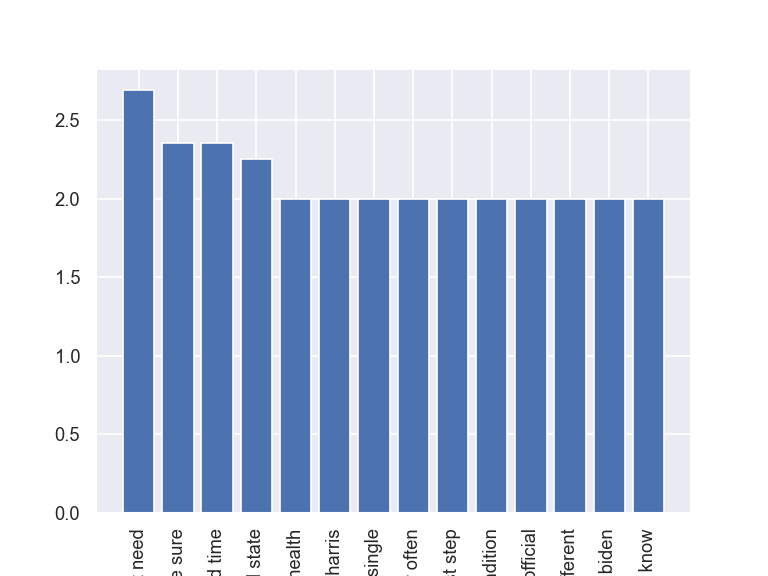

In [41]:
sns.set()
fig,ax=plt.subplots()
ax.bar(df_sum.index,df_sum.importance,label='importance')
ax.set_xticklabels(df_sum.index,rotation=90)
plt.show()

## Bigram - Inspecting Importance by Cluster

### Cluster 1 Importance

In [42]:
cluster1=pd.DataFrame(zip(terms,list(cluster_centers[0]))).sort_values(by=1,ascending=False)
cluster1.columns = ['Words', 'Importance']
bar_cluster1=cluster1.sort_values(by=['Importance'], ascending=False).head(15)

In [43]:
cluster1

,Words,Importance
88,trump administration,0.007271
82,take time,0.004830
76,sleep consumerism,0.002607
10,bliss eso,0.002412
6,back nov,0.001900
...,...,...
15,continue continue,0.000000
54,much better,0.000000
56,need someone,0.000000
35,joe biden,0.000000


<IPython.core.display.Javascript object>


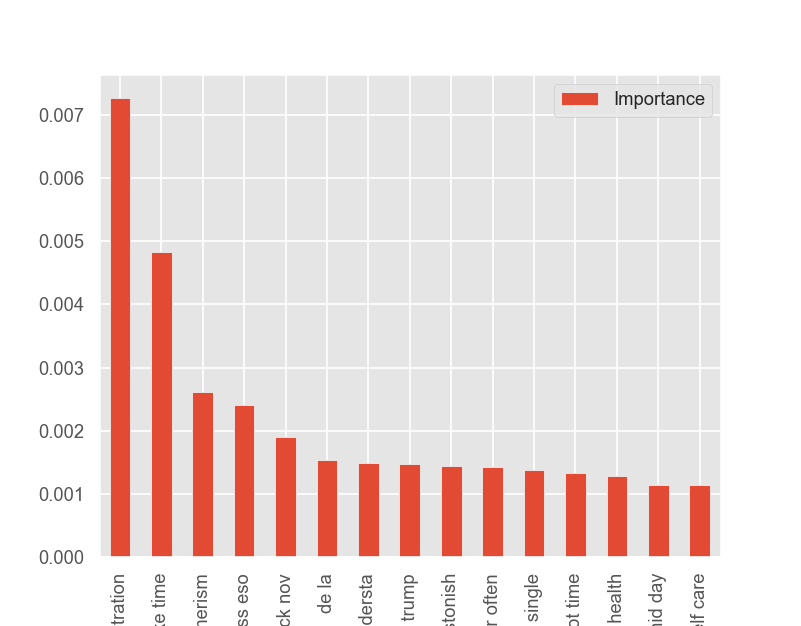

In [45]:
matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster1.plot(x='Words', y='Importance', kind='bar')

### Cluster 2 Importance

In [46]:
cluster2=pd.DataFrame(zip(terms,list(cluster_centers[1]))).sort_values(by=1,ascending=False)
cluster2.columns = ['Words', 'Importance']
bar_cluster2=cluster2.sort_values(by=['Importance'], ascending=False).head(15)

In [47]:
cluster2

,Words,Importance
0,act ki,0.0
63,oxygen level,0.0
73,run away,0.0
72,rough month,0.0
71,rock sleep,0.0
...,...,...
30,first step,0.0
29,fear often,0.0
28,face mask,0.0
27,every single,0.0


<IPython.core.display.Javascript object>


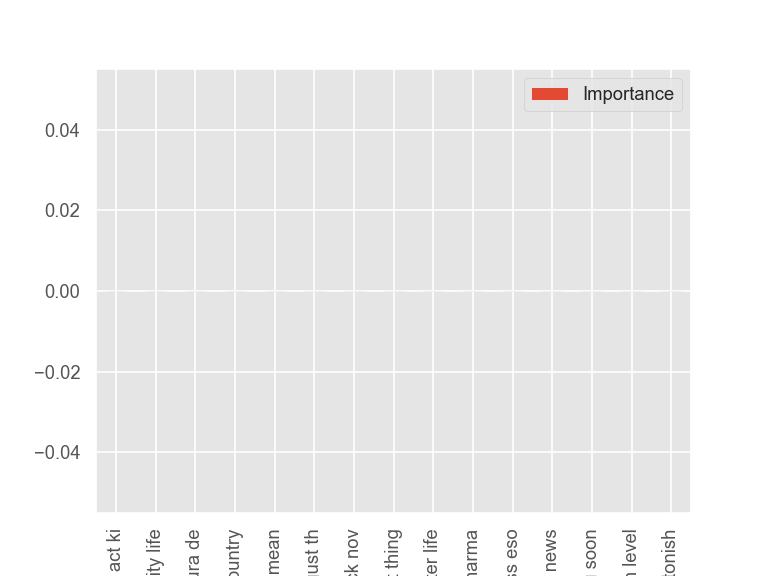

In [49]:
matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster2.plot(x='Words', y='Importance', kind='bar')

### Cluster 3 Importance

In [50]:
cluster3=pd.DataFrame(zip(terms,list(cluster_centers[2]))).sort_values(by=1,ascending=False)
cluster3.columns = ['Words', 'Importance']
bar_cluster3=cluster3.sort_values(by=['Importance'], ascending=False).head(15)

In [51]:
cluster3

,Words,Importance
88,trump administration,0.010022
74,self care,0.008238
13,coming soon,0.007097
15,continue continue,0.007005
81,take mid,0.006670
...,...,...
32,great condition,0.000000
31,got much,0.000000
30,first step,0.000000
29,fear often,0.000000


<IPython.core.display.Javascript object>


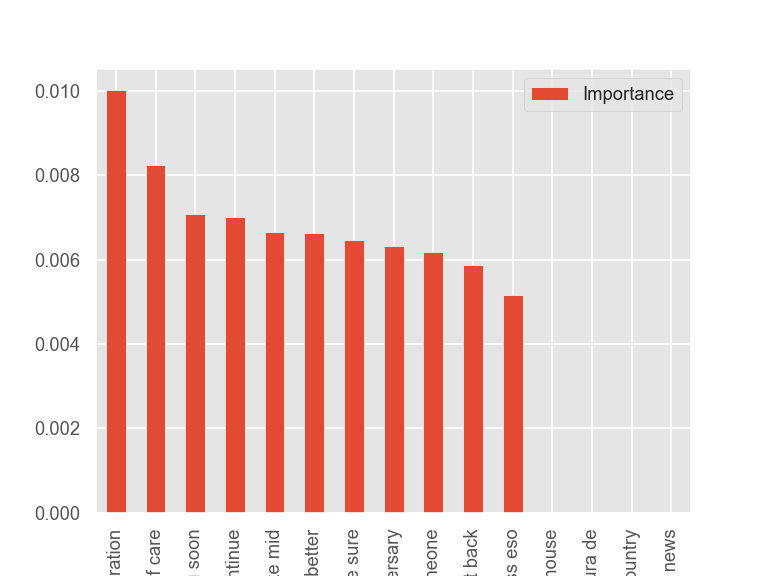

In [53]:
matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster3.plot(x='Words', y='Importance', kind='bar')

### Cluster 4 Importance

In [54]:
cluster4=pd.DataFrame(zip(terms,list(cluster_centers[3]))).sort_values(by=1,ascending=False)
cluster4.columns = ['Words', 'Importance']
bar_cluster4=cluster4.sort_values(by=['Importance'], ascending=False).head(15)

In [55]:
cluster4

,Words,Importance
0,act ki,0.0
63,oxygen level,0.0
73,run away,0.0
72,rough month,0.0
71,rock sleep,0.0
...,...,...
30,first step,0.0
29,fear often,0.0
28,face mask,0.0
27,every single,0.0


<IPython.core.display.Javascript object>


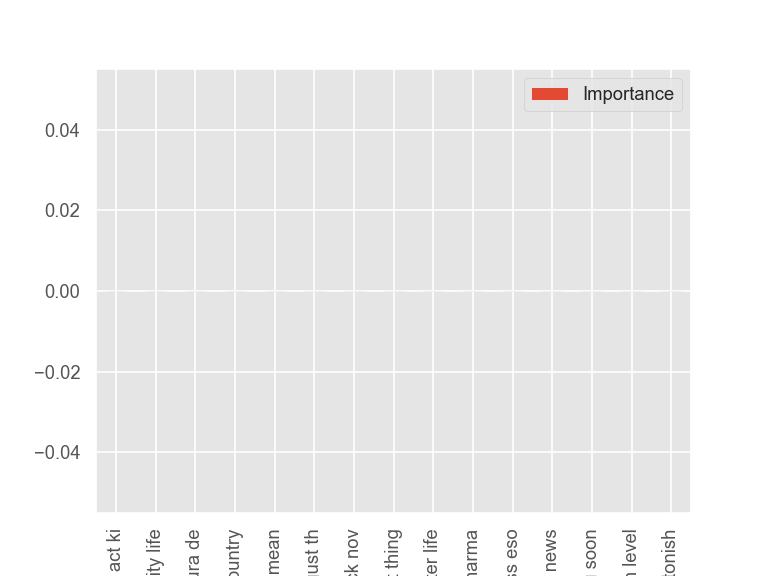

In [56]:
matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster4.plot(x='Words', y='Importance', kind='bar')

### Cluster 5 Importance

In [57]:
cluster5=pd.DataFrame(zip(terms,list(cluster_centers[4]))).sort_values(by=1,ascending=False)
cluster5.columns = ['Words', 'Importance']
bar_cluster5=cluster5.sort_values(by=['Importance'], ascending=False).head(15)

In [58]:
cluster5

,Words,Importance
81,take mid,0.059076
63,oxygen level,0.032699
0,act ki,0.000000
72,rough month,0.000000
71,rock sleep,0.000000
...,...,...
30,first step,0.000000
29,fear often,0.000000
28,face mask,0.000000
27,every single,0.000000


<IPython.core.display.Javascript object>


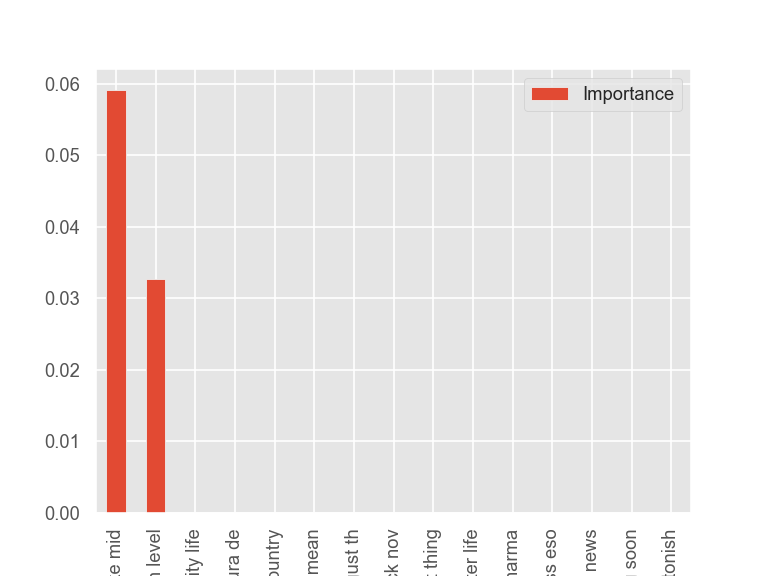

In [59]:
matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster5.plot(x='Words', y='Importance', kind='bar')

### Cluster 6 Importance

In [60]:
cluster6=pd.DataFrame(zip(terms,list(cluster_centers[5]))).sort_values(by=1,ascending=False)
cluster6.columns = ['Words', 'Importance']
bar_cluster6=cluster6.sort_values(by=['Importance'], ascending=False).head(15)

In [61]:
cluster6

,Words,Importance
27,every single,0.022100
35,joe biden,0.012668
26,ear asmr,0.009180
24,dont need,0.008571
19,de la,0.008560
...,...,...
33,health official,0.000000
32,great condition,0.000000
31,got much,0.000000
30,first step,0.000000


<IPython.core.display.Javascript object>


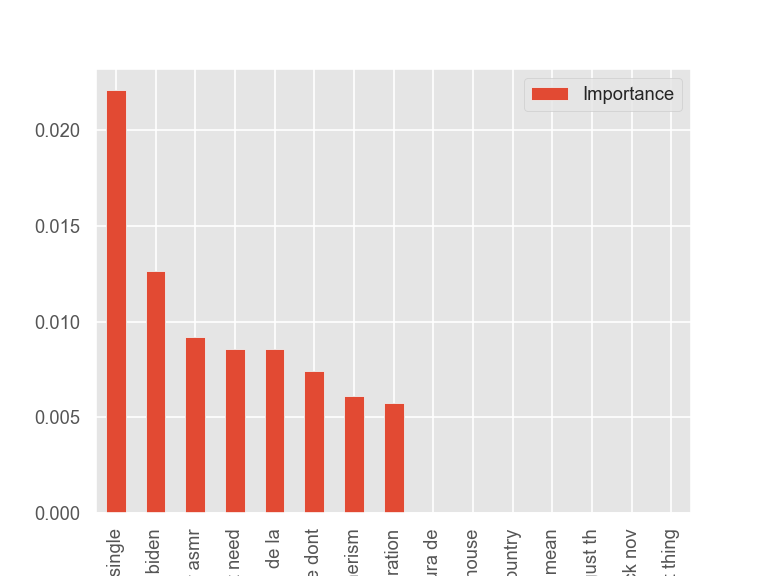

In [62]:
matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster6.plot(x='Words', y='Importance', kind='bar')

## Unigram & Bigram

In [63]:
tv=TfidfVectorizer(max_features=100,ngram_range=(1,2)) 
tv_transform=tv.fit_transform(clean_description_lemmization)

In [64]:
terms=tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:7])

['watch', 'un', 'thought', 'country', 'better', 'face', 'want']
['amp', 'article', 'away', 'back', 'beautiful', 'best', 'better']
['watch', 'thing', 'dont', 'el', 'try', 'mind', 'made']
['amp', 'article', 'away', 'back', 'beautiful', 'best', 'better']
['try', 'right', 'amp', 'article', 'away', 'back', 'beautiful']
['go', 'im', 'give', 'full', 'face', 'something', 'thought']


## Inspect Unigram & Bigram Importance

In [65]:
columns=tv.get_feature_names() # feature names
#transform to DF
df_description=pd.DataFrame(tv_transform.toarray(),columns=columns) #df_
# insepct transformation
tv_sum=df_description.sum() #df
tv_sum.columns = ['importance']

In [66]:
tv_sum.sort_values(ascending=False).head(20)

nan       72.523075
new       14.816081
need      13.103596
like      13.018094
life      12.888784
one       12.853477
via       12.807603
say       12.270497
make      12.052492
great     11.928600
time      11.761063
love      11.502708
people    11.320694
amp       11.121246
want      11.085394
get       10.819067
day       10.733414
know      10.280162
think     10.267144
de        10.079547
dtype: float64

In [67]:
df_sum=pd.DataFrame(tv_sum,columns=['importance']).sort_values(by='importance',ascending=False).iloc[1:15]

<IPython.core.display.Javascript object>


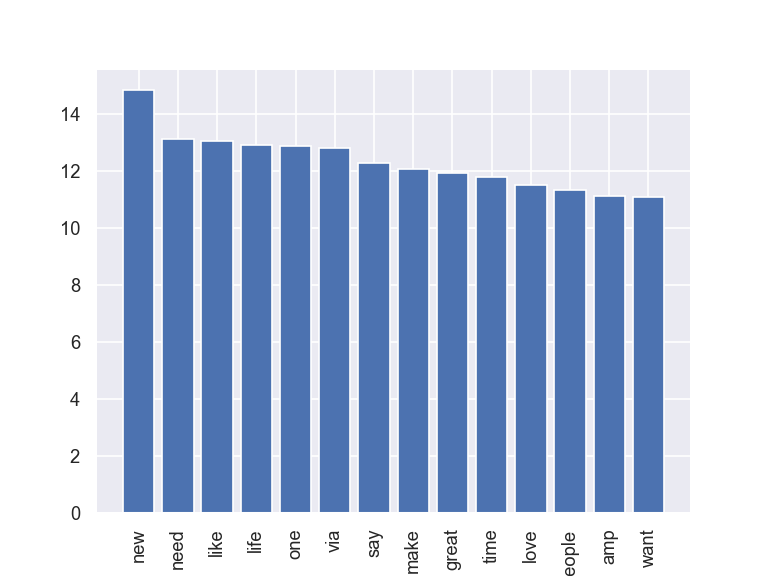

In [68]:
sns.set()
fig,ax=plt.subplots()
ax.bar(df_sum.index,df_sum.importance,label='importance')
ax.set_xticklabels(df_sum.index,rotation=90)
plt.show()

## Unigram & Bigram - Inspecting Importance by Cluster

### Cluster 1 Importance

In [69]:
cluster1=pd.DataFrame(zip(terms,list(cluster_centers[0]))).sort_values(by=1,ascending=False)
cluster1.columns = ['Words', 'Importance']
bar_cluster1=cluster1.sort_values(by=['Importance'], ascending=False).head(15)

In [70]:
cluster1

,Words,Importance
88,watch,0.007271
82,un,0.004830
76,thought,0.002607
10,country,0.002412
6,better,0.001900
...,...,...
15,el,0.000000
54,mind,0.000000
56,nan,0.000000
35,im,0.000000


<IPython.core.display.Javascript object>


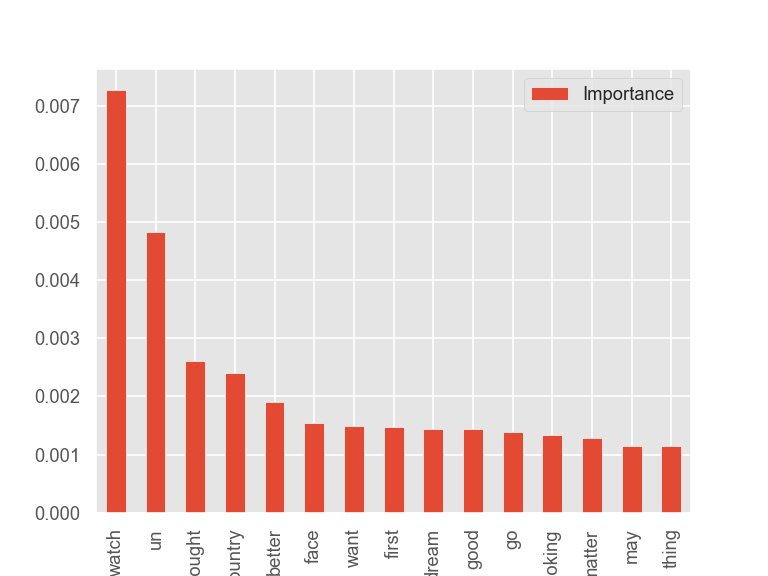

In [71]:
matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster1.plot(x='Words', y='Importance', kind='bar')

### Cluster 2 Importance

In [72]:
cluster2=pd.DataFrame(zip(terms,list(cluster_centers[1]))).sort_values(by=1,ascending=False)
cluster2.columns = ['Words', 'Importance']
bar_cluster2=cluster2.sort_values(by=['Importance'], ascending=False).head(15)

In [73]:
cluster2

,Words,Importance
0,amp,0.0
63,right,0.0
73,thank,0.0
72,th,0.0
71,take,0.0
...,...,...
30,got,0.0
29,good,0.0
28,going,0.0
27,go,0.0


<IPython.core.display.Javascript object>


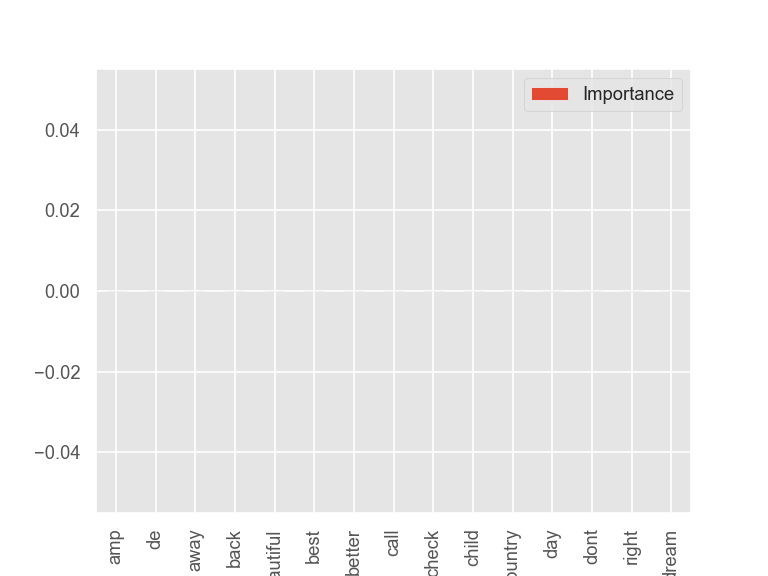

In [74]:
matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster2.plot(x='Words', y='Importance', kind='bar')

### Cluster 3 Importance

In [75]:
cluster3=pd.DataFrame(zip(terms,list(cluster_centers[2]))).sort_values(by=1,ascending=False)
cluster3.columns = ['Words', 'Importance']
bar_cluster3=cluster3.sort_values(by=['Importance'], ascending=False).head(15)

In [76]:
cluster3

,Words,Importance
88,watch,0.010022
74,thing,0.008238
13,dont,0.007097
15,el,0.007005
81,try,0.006670
...,...,...
32,happy,0.000000
31,great,0.000000
30,got,0.000000
29,good,0.000000


<IPython.core.display.Javascript object>


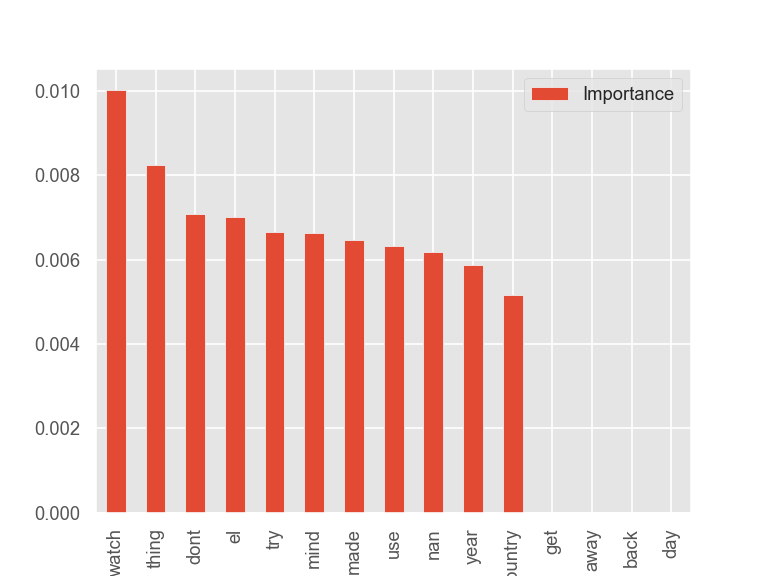

In [77]:
matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster3.plot(x='Words', y='Importance', kind='bar')

### Cluster 4 Importance

In [78]:
cluster4=pd.DataFrame(zip(terms,list(cluster_centers[3]))).sort_values(by=1,ascending=False)
cluster4.columns = ['Words', 'Importance']
bar_cluster4=cluster4.sort_values(by=['Importance'], ascending=False).head(15)

In [79]:
cluster4

,Words,Importance
0,amp,0.0
63,right,0.0
73,thank,0.0
72,th,0.0
71,take,0.0
...,...,...
30,got,0.0
29,good,0.0
28,going,0.0
27,go,0.0


<IPython.core.display.Javascript object>


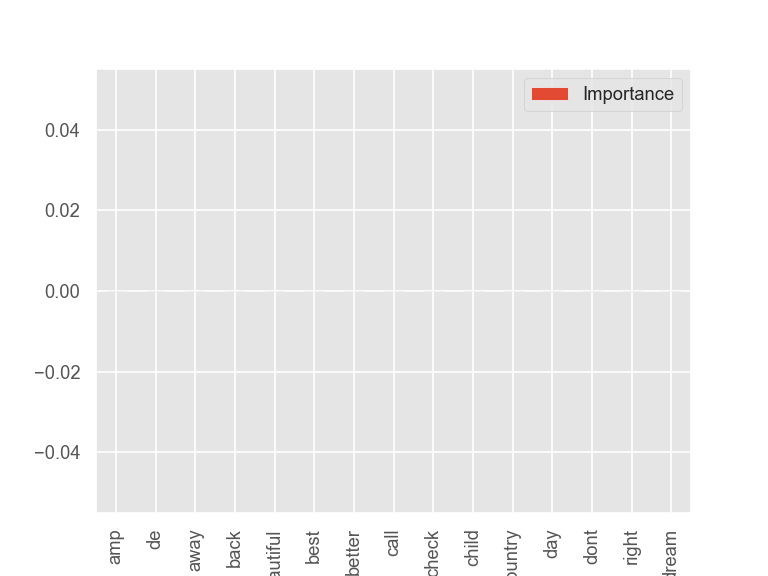

In [80]:
matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster4.plot(x='Words', y='Importance', kind='bar')

### Cluster 5 Importance

In [81]:
cluster5=pd.DataFrame(zip(terms,list(cluster_centers[4]))).sort_values(by=1,ascending=False)
cluster5.columns = ['Words', 'Importance']
bar_cluster5=cluster5.sort_values(by=['Importance'], ascending=False).head(15)

In [82]:
cluster5

,Words,Importance
81,try,0.059076
63,right,0.032699
0,amp,0.000000
72,th,0.000000
71,take,0.000000
...,...,...
30,got,0.000000
29,good,0.000000
28,going,0.000000
27,go,0.000000


<IPython.core.display.Javascript object>


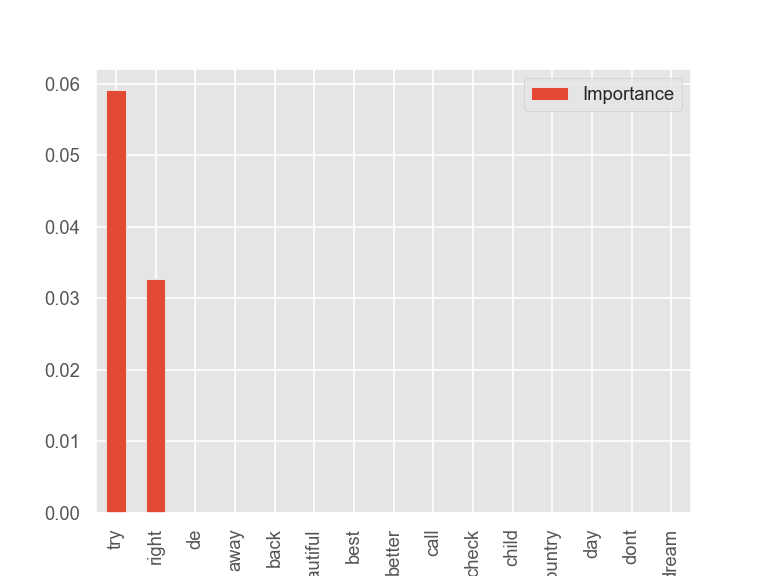

In [83]:
matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster5.plot(x='Words', y='Importance', kind='bar')

### Cluster 6 Importance

In [84]:
cluster6=pd.DataFrame(zip(terms,list(cluster_centers[5]))).sort_values(by=1,ascending=False)
cluster6.columns = ['Words', 'Importance']
bar_cluster6=cluster6.sort_values(by=['Importance'], ascending=False).head(15)

In [85]:
cluster6

,Words,Importance
27,go,0.022100
35,im,0.012668
26,give,0.009180
24,full,0.008571
19,face,0.008560
...,...,...
33,health,0.000000
32,happy,0.000000
31,great,0.000000
30,got,0.000000


<IPython.core.display.Javascript object>


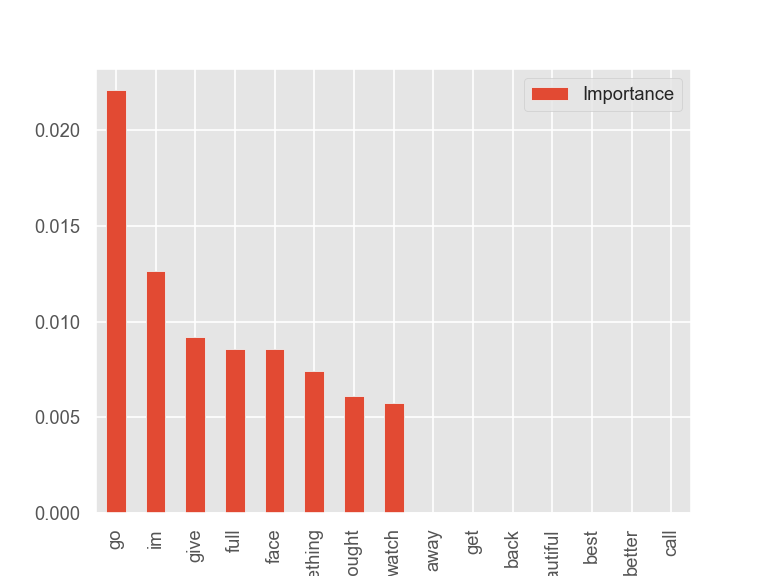

In [86]:
matplotlib.style.use('ggplot')
#bar_cluster1.set_color('pink')
bar_cluster6.plot(x='Words', y='Importance', kind='bar')